In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re

from wordcloud import WordCloud
import nltk.sentiment

import acquire
import prepare

#### 1. Spam Data
- See notes_explore_nlp.ipynb

#### 2. Explore the blog article using the techniques discussed in the exploration lesson

In [2]:
blogs = acquire.get_blog_articles()
news = acquire.get_news_articles()

/Users/morgancross/codeup-data-science/natural-language-processing-exercises/acquire.py:15: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 15 of the file /Users/morgancross/codeup-data-science/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  article_soup = BeautifulSoup(requests.get(blog, headers=header).content)
/Users/morgancross/codeup-data-science/natural-language-processing-exercises/acquire.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code

In [3]:
blogs

,title,content
0,Coding Bootcamp or Computer Science Degree?,"For many people, deciding between a coding boo..."
1,Diversity Equity and Inclusion Report,Codeup is excited to launch our first Diversit...
2,Codeup Honored as SABJ Diversity and Inclusion...,Codeup has been named the 2022 Diversity and I...
3,How Can I Finance My Career Transition?,Deciding to transition into a tech career is a...
4,Tips for Women Beginning a Career in Tech,"Codeup strongly values diversity, and inclusio..."
5,What is Cloud Computing and AWS?,With many companies switching to cloud service...


In [25]:
clean_blog = prepare.clean_df(blogs, ['content'])

In [26]:
blog_words = ' '.join(clean_blog.content_clean).split(' ')

Text(0.5, 1.0, 'Top 20 Blog Bigrams')

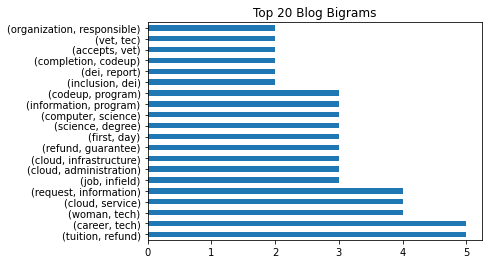

In [27]:
pd.Series(nltk.ngrams(blog_words, 2)).value_counts().head(20).plot.barh()
plt.title('Top 20 Blog Bigrams')

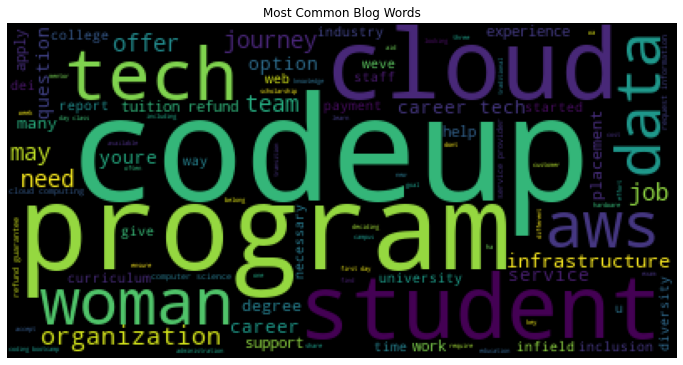

In [28]:
plt.figure(figsize=(12,8))
img = WordCloud().generate(' '.join(blog_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Blog Words')
plt.show()

In [30]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()
blogs['sentiment'] = clean_blog.content_clean.apply(lambda doc: sia.polarity_scores(doc)['compound'])
blogs

,title,content,sentiment
0,Coding Bootcamp or Computer Science Degree?,"For many people, deciding between a coding boo...",0.9972
1,Diversity Equity and Inclusion Report,Codeup is excited to launch our first Diversit...,0.9848
2,Codeup Honored as SABJ Diversity and Inclusion...,Codeup has been named the 2022 Diversity and I...,0.9545
3,How Can I Finance My Career Transition?,Deciding to transition into a tech career is a...,0.9931
4,Tips for Women Beginning a Career in Tech,"Codeup strongly values diversity, and inclusio...",0.9731
5,What is Cloud Computing and AWS?,With many companies switching to cloud service...,0.9907


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

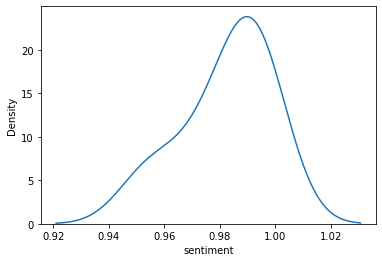

In [32]:
sns.kdeplot(blogs.sentiment)

#### 3. Explore the news articles using techniques discussed in the exploration lesson. Use the category variable when exploring.

In [34]:
news.head()

,title,content,category
0,India beat NZ 3-2 to enter CWG hockey finals,In the CWG men's hockey semi-final against New...,india
1,Infosys Gifts Sikka Shares Worth Rs 8.2cr,"In a regulatory filing to the BSE on Friday, I...",india
2,Kashmir's famous Dal Lake freezes,After the recent snowfall in upper reaches of ...,india
3,"Nigerian weightlifter in dope net, India may gain",India may move up after Nigerian weightlifter ...,india
4,"Samsung launches Galaxy Star 2 Plus at Rs.7,335",Samsung has unveiled the Galaxy start 2 Plus s...,india


In [56]:
news_clean = prepare.clean_df(news, ['content'], extra_words=['\'', 'said', 'ha'])
news_clean.head()

,title,content,category,content_clean
0,India beat NZ 3-2 to enter CWG hockey finals,In the CWG men's hockey semi-final against New...,india,cwg men hockey semifinal new zealand saturday ...
1,Infosys Gifts Sikka Shares Worth Rs 8.2cr,"In a regulatory filing to the BSE on Friday, I...",india,regulatory filing bse friday infosys ltd decid...
2,Kashmir's famous Dal Lake freezes,After the recent snowfall in upper reaches of ...,india,recent snowfall upper reach kashmir himalayan ...
3,"Nigerian weightlifter in dope net, India may gain",India may move up after Nigerian weightlifter ...,india,india may move nigerian weightlifter chika ama...
4,"Samsung launches Galaxy Star 2 Plus at Rs.7,335",Samsung has unveiled the Galaxy start 2 Plus s...,india,samsung unveiled galaxy start 2 plus smartphon...


In [57]:
news_clean.category.unique()

array(['india', 'business', 'sports', 'world', 'politics', 'technology',
       'startup', 'entertainment', 'miscellaneous', 'hatke', 'science',
       'automobile'], dtype=object)

In [65]:
business_words = ' '.join(news_clean[news_clean.category == 'business'].content_clean)
world_words = ' '.join(news_clean[news_clean.category == 'world'].content_clean)
science_words = ' '.join(news_clean[news_clean.category == 'science'].content_clean)
all_words = ' '.join(news_clean[(news_clean.category == 'science')|(news_clean.category == 'world')\
                               | (news_clean.category == 'business')].content_clean)

In [66]:
business_freq = pd.Series(business_words.split()).value_counts()
world_freq = pd.Series(world_words.split()).value_counts()
science_freq = pd.Series(science_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [67]:
word_counts = pd.concat([business_freq, world_freq, science_freq, all_freq], axis=1).fillna(0).astype(int)

In [68]:
word_counts.columns = ['business', 'world', 'science', 'all']

In [69]:
word_counts.sort_values('all', ascending=False).head()

,business,world,science,all
wa,7,9,6,22
company,17,0,0,17
added,2,8,4,14
india,8,3,2,13
could,2,7,4,13


In [70]:
word_counts.sort_values('business', ascending=False).head()

,business,world,science,all
company,17,0,0,17
employee,9,0,0,9
bank,8,1,0,9
india,8,3,2,13
ceo,7,0,0,7


In [71]:
word_counts.sort_values('world', ascending=False).head()

,business,world,science,all
russia,0,9,0,9
wa,7,9,6,22
ukraine,0,8,0,8
added,2,8,4,14
u,2,8,1,11


In [72]:
word_counts.sort_values('science', ascending=False).head()

,business,world,science,all
researcher,0,0,12,12
nasa,0,0,9,9
star,0,0,8,8
year,1,4,7,12
first,0,0,7,7


<Figure size 1152x648 with 0 Axes>

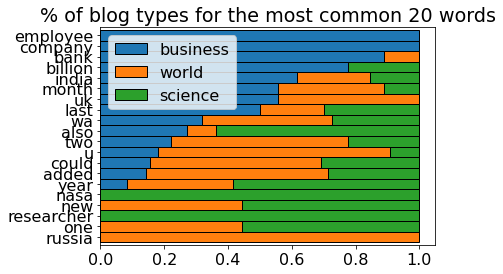

In [74]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'business')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of blog types for the most common 20 words')
plt.show()

<AxesSubplot:>

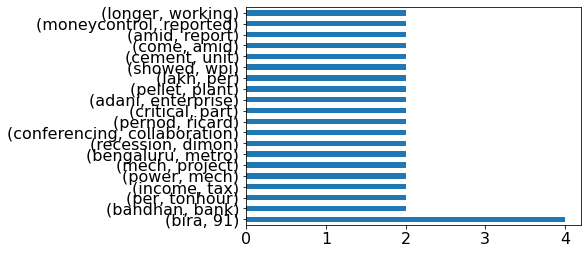

In [83]:
pd.Series(nltk.ngrams((business_words.split()), 2)).value_counts().head(20).plot.barh()

<AxesSubplot:>

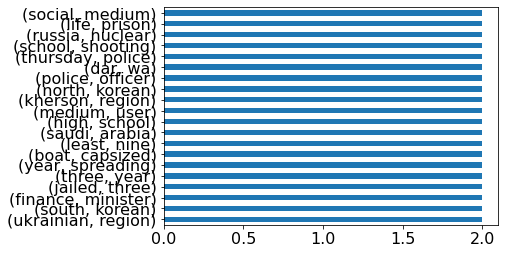

In [84]:
pd.Series(nltk.ngrams((world_words.split()), 2)).value_counts().head(20).plot.barh()

<AxesSubplot:>

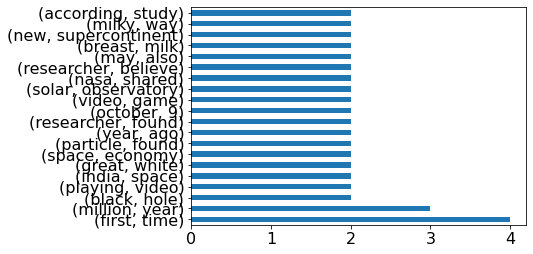

In [85]:
pd.Series(nltk.ngrams((science_words.split()), 2)).value_counts().head(20).plot.barh()

<AxesSubplot:>

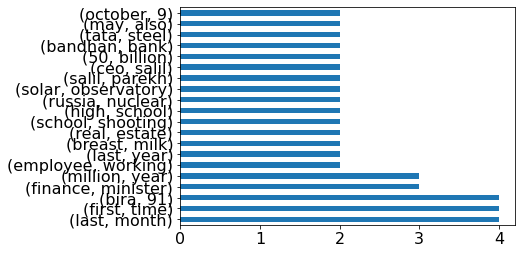

In [86]:
pd.Series(nltk.ngrams((all_words.split()), 2)).value_counts().head(20).plot.barh()

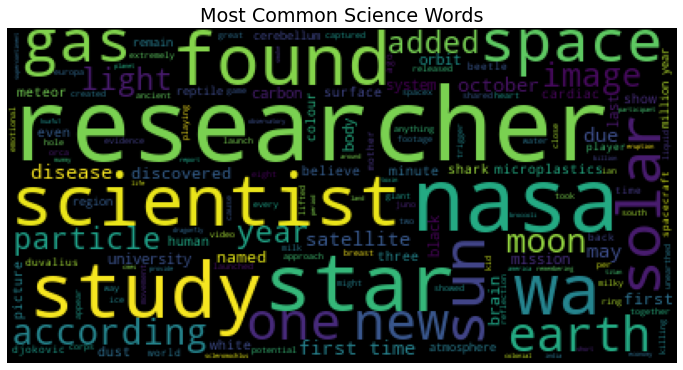

In [88]:
plt.figure(figsize=(12,8))
img = WordCloud().generate(science_words)
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Science Words')
plt.show()

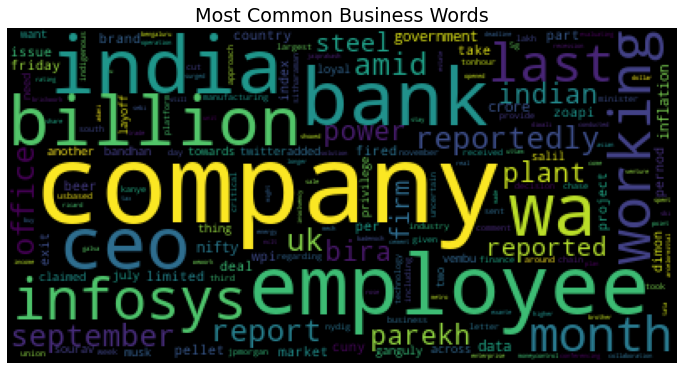

In [89]:
plt.figure(figsize=(12,8))
img = WordCloud().generate(business_words)
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Business Words')
plt.show()

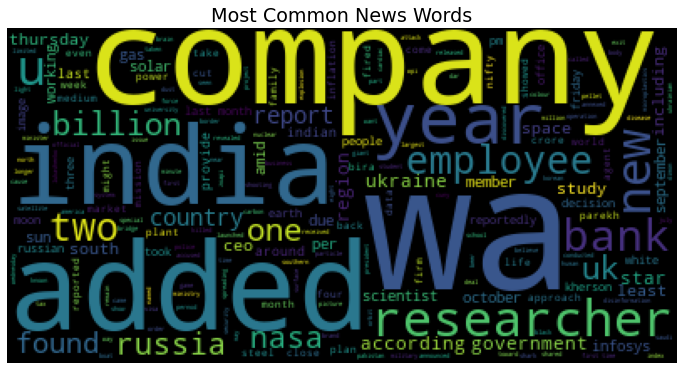

In [90]:
plt.figure(figsize=(12,8))
img = WordCloud().generate(all_words)
plt.imshow(img)
plt.axis('off')
plt.title('Most Common News Words')
plt.show()

In [91]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()
news_clean['sentiment'] = news_clean.content_clean.apply(lambda doc: sia.polarity_scores(doc)['compound'])
news_clean

,title,content,category,content_clean,sentiment
0,India beat NZ 3-2 to enter CWG hockey finals,In the CWG men's hockey semi-final against New...,india,cwg men hockey semifinal new zealand saturday ...,0.7003
1,Infosys Gifts Sikka Shares Worth Rs 8.2cr,"In a regulatory filing to the BSE on Friday, I...",india,regulatory filing bse friday infosys ltd decid...,0.4767
2,Kashmir's famous Dal Lake freezes,After the recent snowfall in upper reaches of ...,india,recent snowfall upper reach kashmir himalayan ...,-0.0772
3,"Nigerian weightlifter in dope net, India may gain",India may move up after Nigerian weightlifter ...,india,india may move nigerian weightlifter chika ama...,0.7717
4,"Samsung launches Galaxy Star 2 Plus at Rs.7,335",Samsung has unveiled the Galaxy start 2 Plus s...,india,samsung unveiled galaxy start 2 plus smartphon...,0.5859
...,...,...,...,...,...
280,Fix for wheel issue that caused electric car r...,Toyota Motor said it has found a fix for the d...,automobile,toyota motor found fix defect recall several u...,-0.4939
281,TVS Motor beats Hero MotoCorp to become 6th mo...,TVS Motor Company Limited has become the sixth...,automobile,tv motor company limited become sixth mostvalu...,0.7003
282,Tesla to remove more sensors from cars amid au...,"As Tesla faces autopilot scrutiny, it will onl...",automobile,tesla face autopilot scrutiny use camera safet...,0.4215
283,UP govt announces new EV policy to attract ₹30...,The Uttar Pradesh government announced a new e...,automobile,uttar pradesh government announced new electri...,0.9136


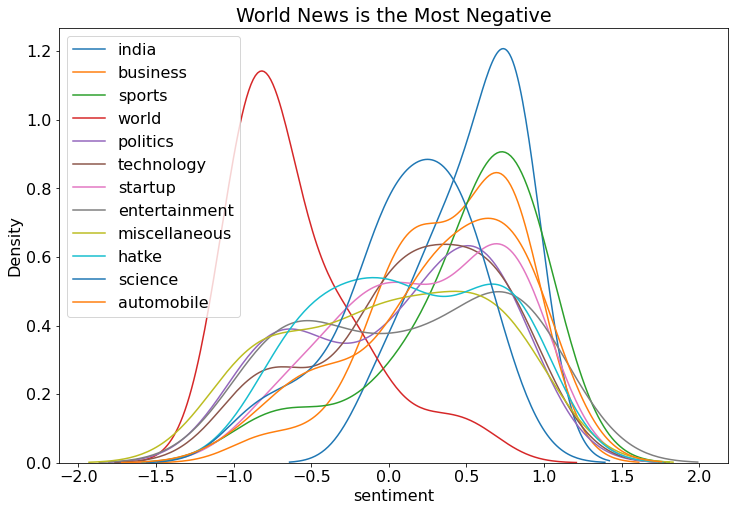

In [94]:
plt.figure(figsize=(12,8))
for col in news_clean.category.unique():
    sns.kdeplot(news_clean[news_clean.category == col].sentiment, label = col)

plt.legend(news_clean.category.unique())
plt.title('World News is the Most Negative')
plt.show()

### Key finding: World news is depressing